### Importa los módulos necesarios y establece configuraciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import funs
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


### Importa los nodos y sus respectivos periodos
- Los registros de los nodos se almacenan en un diccionario de dataframes indexado por periodos de medición.

In [2]:
#                                                                            |
tabla={}
for t in [1,2,3]:
    tabla[t]=[]
    for nodo in [2,3,5]:
        datos = pd.read_csv('nodo%d_periodo%d.csv'%(nodo,t),parse_dates=True,
                            index_col=0)
        datos.columns = [j+str(nodo) for j in datos.columns]
        tabla[t].append(datos)

### Concatena los DFs contenidos 
- Se obtiene un dataframe para cada periodo de medición con la información ordenada de los nodos 2, 3 y 5.

In [3]:
#                                                                            |
periodo = {}
for t in [1,2,3]:
    periodo[t] = tabla[t][0].join(tabla[t][1], how='outer').join(tabla[t][2],
                                                                 how='outer')
    display(periodo[t].head())

,HUMEDAD DE LA TIERRA2,HUMEDAD RELATIVA2,INTENSIDAD LUMÍNICA2,TEMPERATURA2,HUMEDAD DE LA TIERRA3,HUMEDAD RELATIVA3,INTENSIDAD LUMÍNICA3,TEMPERATURA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA5,TEMPERATURA5
2018-05-09 10:25:00,62.61,18.0,5853.0,29.0,60.20,59.0,5806.0,29.0,80.42,58.0,5829.0,30.0
2018-05-09 10:26:00,62.61,18.0,5853.0,29.0,60.04,58.0,5806.0,29.0,73.20,57.0,5829.0,30.0
2018-05-09 10:27:00,62.45,18.0,5853.0,29.0,59.72,58.0,5841.0,29.0,67.75,57.0,5841.0,30.0
2018-05-09 10:28:00,62.45,18.0,5853.0,30.0,59.72,58.0,5806.0,29.0,63.25,57.0,5824.0,30.0
2018-05-09 10:29:00,62.45,18.0,5859.0,30.0,59.40,57.0,5818.0,30.0,58.92,56.0,5835.0,30.0


,HUMEDAD DE LA TIERRA2,HUMEDAD RELATIVA2,INTENSIDAD LUMÍNICA2,TEMPERATURA2,HUMEDAD DE LA TIERRA3,HUMEDAD RELATIVA3,INTENSIDAD LUMÍNICA3,TEMPERATURA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA5,TEMPERATURA5
2018-05-23 10:08:00,78.50,49.0,5829.0,35.0,98.88,33.0,5788.0,30.0,43.19,35.0,5782.0,30.0
2018-05-23 10:09:00,78.34,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,42.87,35.0,5777.0,30.0
2018-05-23 10:10:00,78.50,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,44.63,35.0,5788.0,30.0
2018-05-23 10:11:00,78.34,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,45.60,35.0,5788.0,30.0
2018-05-23 10:12:00,78.34,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,44.79,35.0,5794.0,30.0


,HUMEDAD DE LA TIERRA2,HUMEDAD RELATIVA2,INTENSIDAD LUMÍNICA2,TEMPERATURA2,HUMEDAD DE LA TIERRA3,HUMEDAD RELATIVA3,INTENSIDAD LUMÍNICA3,TEMPERATURA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA5,TEMPERATURA5
2018-06-05 14:41:00,6.11,16.0,5841.0,34.0,1.14,16.0,5847.0,36.0,13.82,24.0,5829.0,34.0
2018-06-05 14:42:00,6.11,16.0,5847.0,34.0,1.14,16.0,5847.0,36.0,14.30,24.0,5829.0,33.0
2018-06-05 14:43:00,6.11,16.0,5841.0,34.0,0.82,17.0,5847.0,36.0,14.14,24.0,5829.0,33.0
2018-06-05 14:44:00,5.95,16.0,5841.0,34.0,0.82,16.0,5847.0,35.0,13.98,23.0,5824.0,33.0
2018-06-05 14:45:00,5.95,16.0,5841.0,34.0,0.98,17.0,5847.0,35.0,13.98,23.0,5824.0,33.0


### Ordena las columnas de los dataframes por orden alfabético

In [4]:
for t in periodo:
    periodo[t] = periodo[t].reindex(columns = sorted(periodo[t].columns))
    display('periodo #%d'%t,periodo[t].head())

'periodo #1'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
2018-05-09 10:25:00,62.61,60.20,80.42,18.0,59.0,58.0,5853.0,5806.0,5829.0,29.0,29.0,30.0
2018-05-09 10:26:00,62.61,60.04,73.20,18.0,58.0,57.0,5853.0,5806.0,5829.0,29.0,29.0,30.0
2018-05-09 10:27:00,62.45,59.72,67.75,18.0,58.0,57.0,5853.0,5841.0,5841.0,29.0,29.0,30.0
2018-05-09 10:28:00,62.45,59.72,63.25,18.0,58.0,57.0,5853.0,5806.0,5824.0,30.0,29.0,30.0
2018-05-09 10:29:00,62.45,59.40,58.92,18.0,57.0,56.0,5859.0,5818.0,5835.0,30.0,30.0,30.0


'periodo #2'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
2018-05-23 10:08:00,78.50,98.88,43.19,49.0,33.0,35.0,5829.0,5788.0,5782.0,35.0,30.0,30.0
2018-05-23 10:09:00,78.34,98.56,42.87,49.0,33.0,35.0,5829.0,5788.0,5777.0,35.0,30.0,30.0
2018-05-23 10:10:00,78.50,98.56,44.63,49.0,33.0,35.0,5829.0,5788.0,5788.0,35.0,30.0,30.0
2018-05-23 10:11:00,78.34,98.56,45.60,49.0,33.0,35.0,5829.0,5788.0,5788.0,35.0,30.0,30.0
2018-05-23 10:12:00,78.34,98.56,44.79,49.0,33.0,35.0,5829.0,5788.0,5794.0,35.0,30.0,30.0


'periodo #3'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
2018-06-05 14:41:00,6.11,1.14,13.82,16.0,16.0,24.0,5841.0,5847.0,5829.0,34.0,36.0,34.0
2018-06-05 14:42:00,6.11,1.14,14.30,16.0,16.0,24.0,5847.0,5847.0,5829.0,34.0,36.0,33.0
2018-06-05 14:43:00,6.11,0.82,14.14,16.0,17.0,24.0,5841.0,5847.0,5829.0,34.0,36.0,33.0
2018-06-05 14:44:00,5.95,0.82,13.98,16.0,16.0,23.0,5841.0,5847.0,5824.0,34.0,35.0,33.0
2018-06-05 14:45:00,5.95,0.98,13.98,16.0,17.0,23.0,5841.0,5847.0,5824.0,34.0,35.0,33.0


### Matrices de correlación de las variables para los tres periodos de medición
- Se obtiene una matriz de correlación cruzada de las variables humedad de la tierra, humedad relativa, intensidad lumínica y temperatura de los nodos 2, 3 y 5 para cada periodo de medición.

<Figure size 432x288 with 0 Axes>

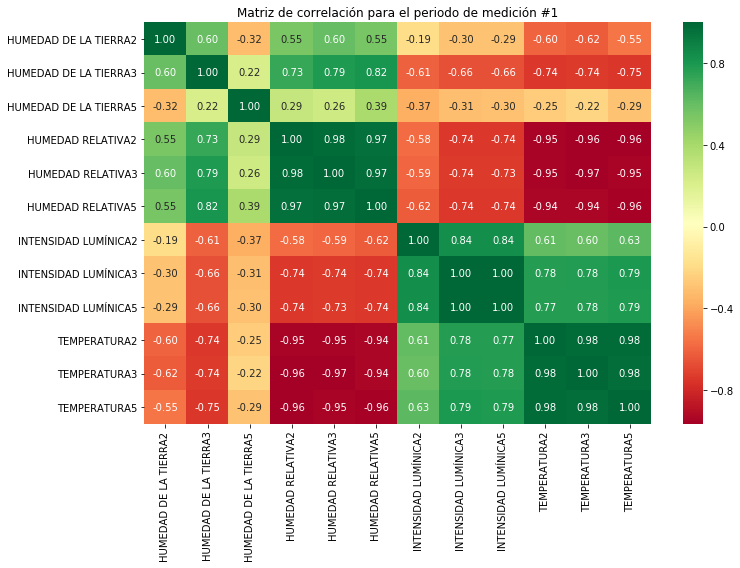

<Figure size 792x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

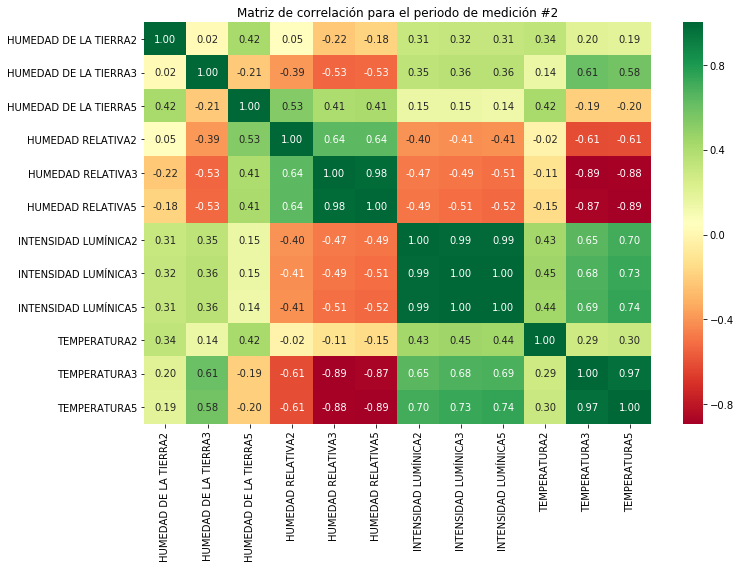

<Figure size 792x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

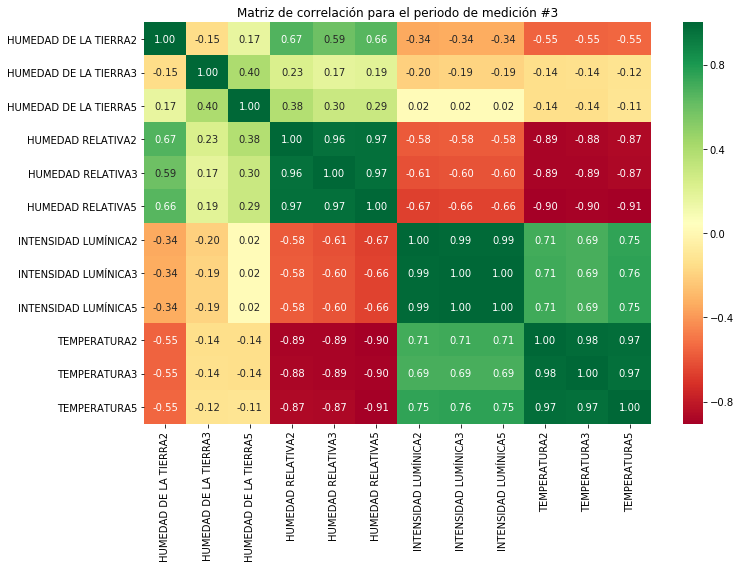

<Figure size 792x576 with 0 Axes>

In [5]:
for t in periodo:
    plt.figure()
    tcorr = periodo[t].corr()
    plt.figure(figsize=[11,8])
    plt.title('Matriz de correlación para el periodo de medición #%d'%t)
    sns.heatmap(tcorr, annot=True, cmap='RdYlGn',fmt=".2f")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=[11,8])
    plt.savefig('p%d.png'%t,
                transparent=True,bbox_inches='tight')    

La correlación entre las variables se hace más debil entre mayor es la cantidad de días en los que se registran valores.

A partir de los gráficos es posible deducir relaciones existentes entre las variables:
- Relación de proporcionaliad inversa entre la temperatura y la humedad relativa.
- Correlación positiva entre la humedad relativa y la humedad del suelo.
- Correspodencia de los valores máximos de intensidad lumínica con los ciclos positivos de temperatura.

Correlaciones positivas
- Temperatura - Intensidad Lumínica.
- Humedad Relativa - Humedad de la Tierra.
- Temperatura - Humedad de la Tierra.

Correlaciones negativas
- Temperatura - Humedad Relativa
- Temperatura - Humedad de la Tierra.
- Humedad Relativa - Intensidad Lumínica.

A continuación se realiza un grafico de matriz de correlación para visualizar mejor la relación entre las varibles.

### Normaliza las variables

In [6]:
df={}
for t in periodo:
    df[t] = periodo[t].copy()
    df[t].iloc[:,:] = StandardScaler().fit_transform(df[t].iloc[:,:])

### Matrices de covarianza de las variables para los tres periodos de medición

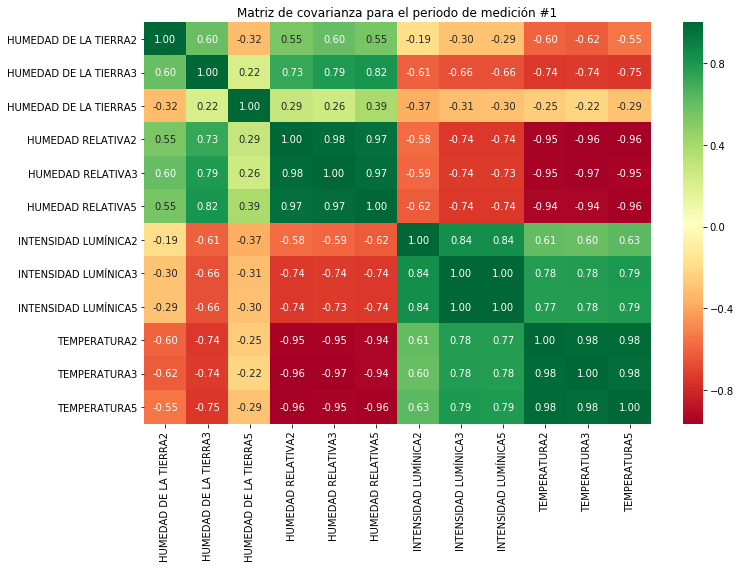

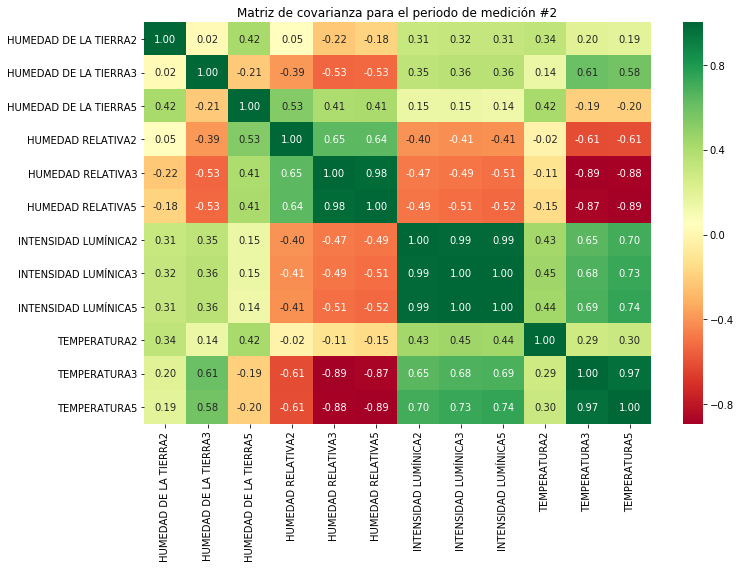

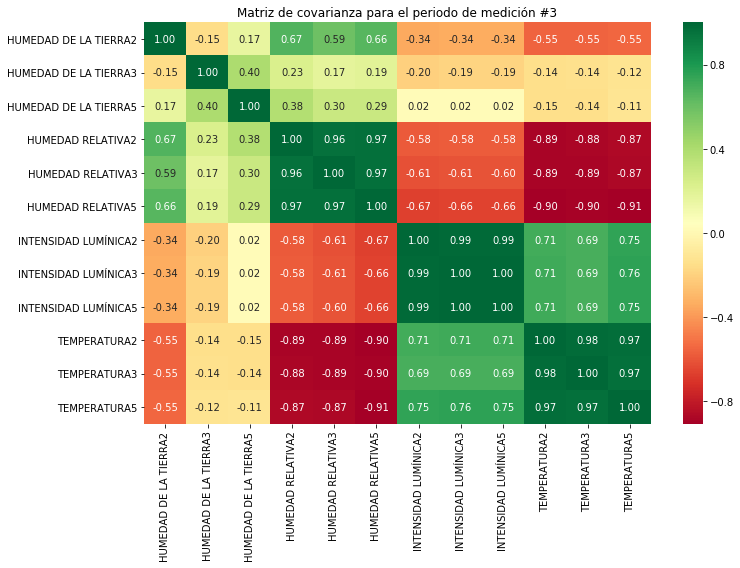

In [7]:
for t in df:
    tcov = df[t].cov()
    plt.figure(figsize=[11,8])
    plt.title('Matriz de covarianza para el periodo de medición #%d'%t)
    sns.heatmap(tcov, annot=True,cmap='RdYlGn',fmt=".2f")
    plt.tight_layout()
    plt.show()

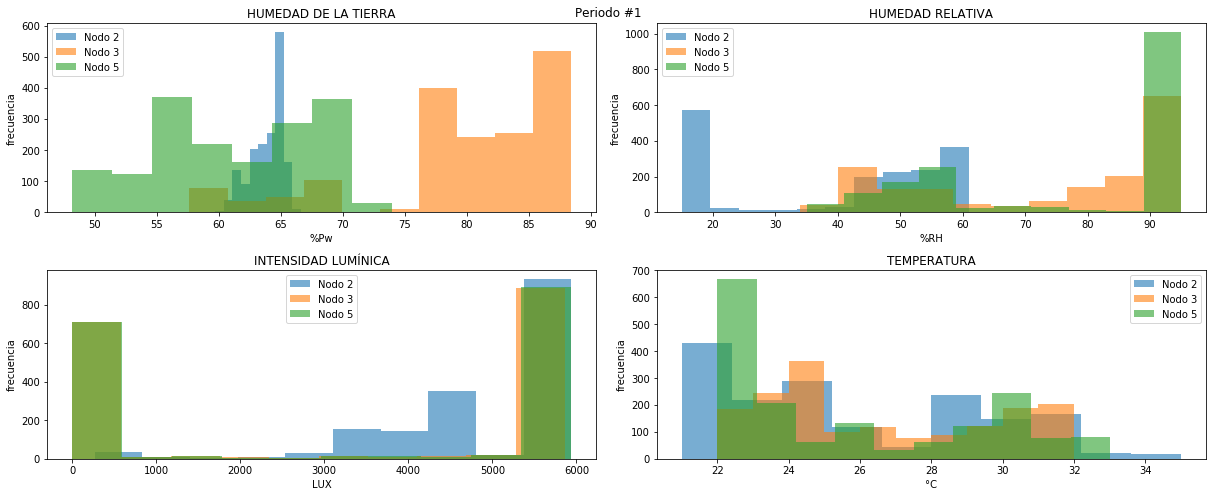

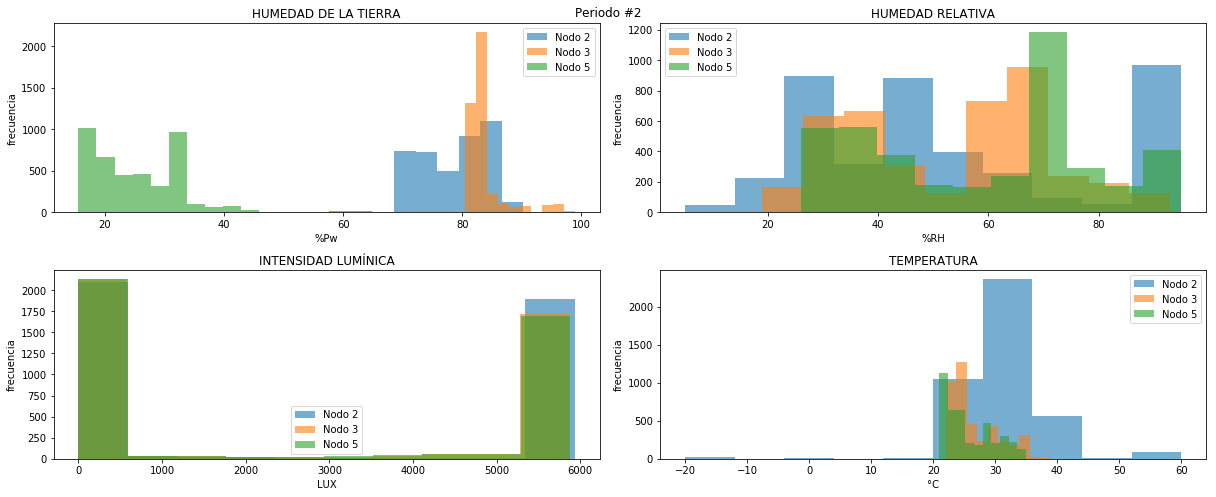

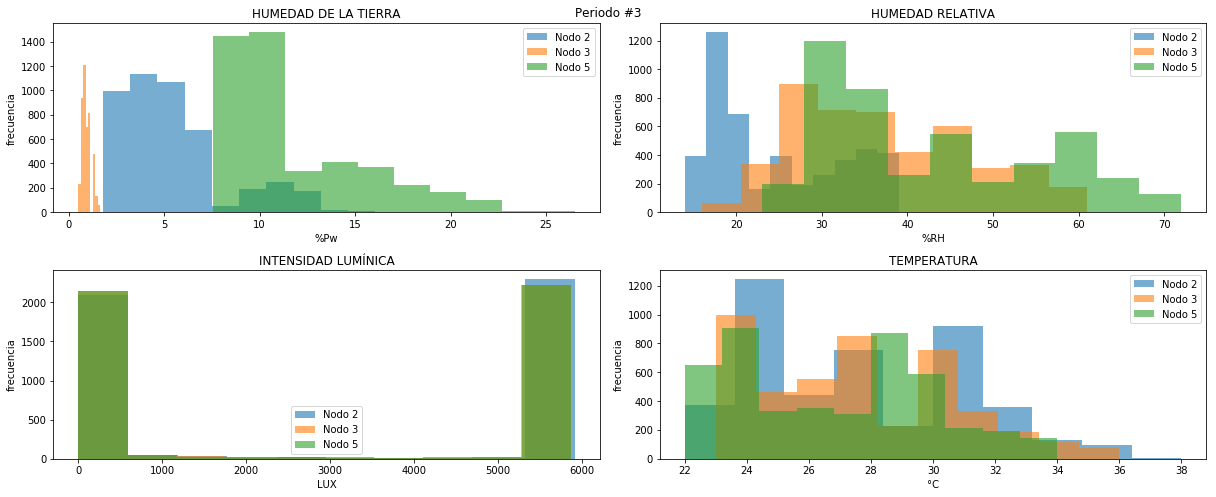

In [8]:
vars={'TEMPERATURA':'°C','HUMEDAD RELATIVA':'%RH',
      'HUMEDAD DE LA TIERRA':'%Pw', 'INTENSIDAD LUMÍNICA':'LUX'}

for t in periodo:    
    plt.figure(figsize=[17,7])
    plt.suptitle('Periodo #%d'%t)
    sub=221
    varia=0
    for var in periodo[1].columns:
        varia+=1
        if varia>3:
            sub+=1
            plt.subplot(str(sub))
            varia=1
        plt.subplot(str(sub))
        n=[x for x in ['2', '3', '5'] if x in var]
        nv=[var.strip(x) for x in ['2', '3', '5'] if x in var]
        plt.title(nv[0])
        plt.xlabel('%s'%(vars[nv[0]]))
        plt.ylabel('frecuencia')
        plt.hist(periodo[t][var], alpha=.6,label='Nodo %s'%n[0])
        plt.legend()
        plt.tight_layout()

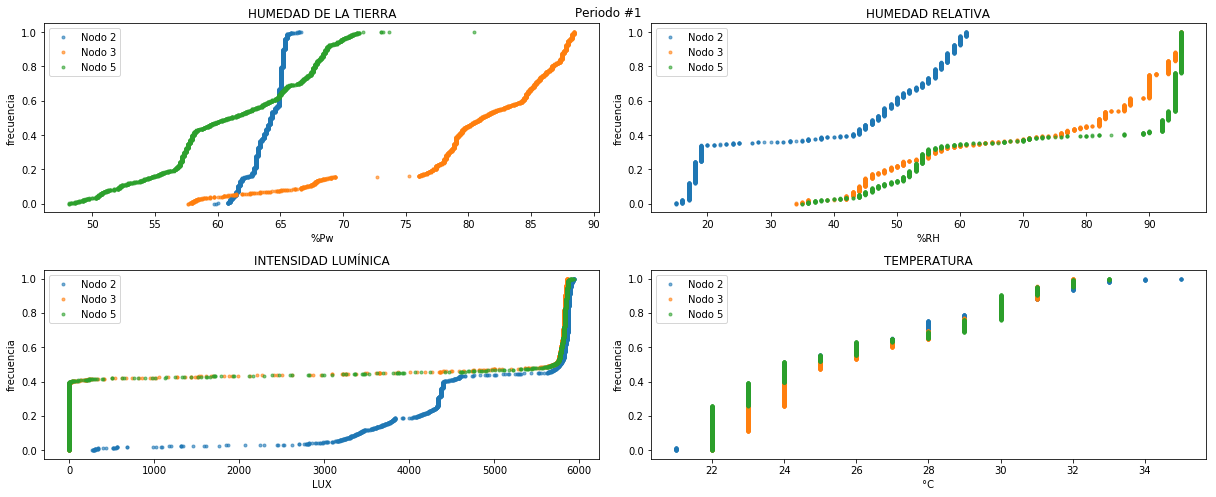

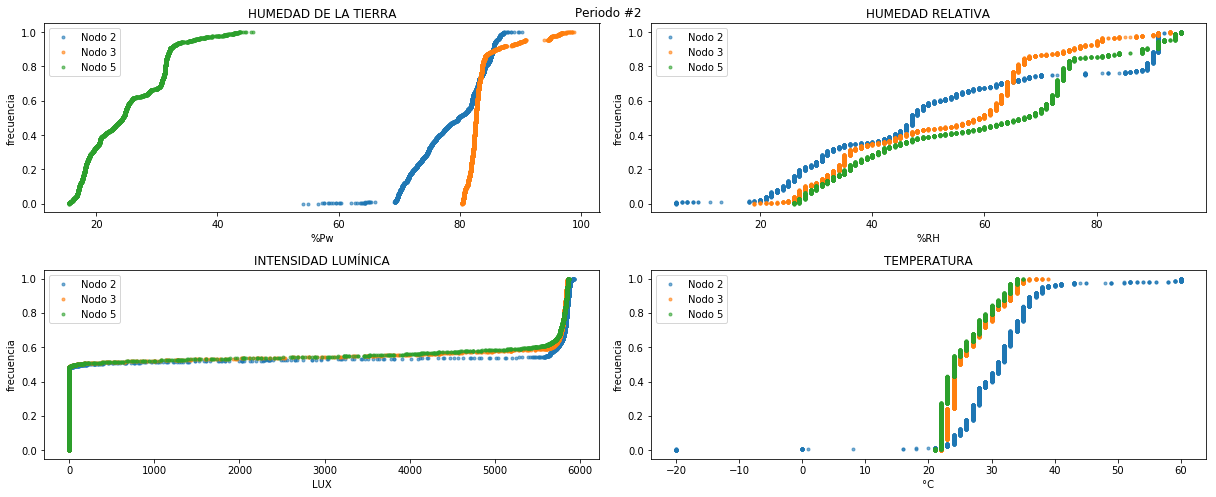

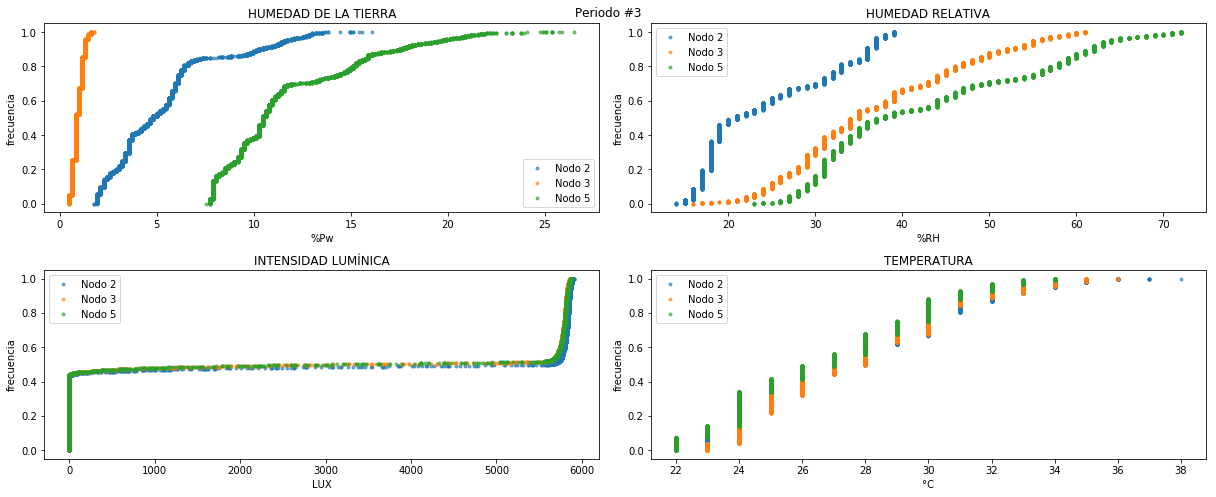

In [9]:
vars={'TEMPERATURA':'°C','HUMEDAD RELATIVA':'%RH',
      'HUMEDAD DE LA TIERRA':'%Pw', 'INTENSIDAD LUMÍNICA':'LUX'}

import numpy as np

def ecdf(var):
    
    n = len(var)
    x = np.sort(var)
    y = np.arange(1,n+1)/n
    
    return x,y

for t in periodo:    
    plt.figure(figsize=[17,7])
    plt.suptitle('Periodo #%d'%t)
    sub=221
    varia=0
    for var in periodo[1].columns:
        varia+=1
        if varia>3:
            sub+=1
            plt.subplot(str(sub))
            varia=1
        plt.subplot(sub)
        n=[x for x in ['2', '3', '5'] if x in var]
        nv=[var.strip(x) for x in ['2', '3', '5'] if x in var]
        plt.title(nv[0])
        plt.xlabel('%s'%(vars[nv[0]]))
        plt.ylabel('frecuencia')
        x,y=ecdf(periodo[t][var])
        plt.plot(x,y, alpha=.6,label='Nodo %s'%n[0],marker='.',linestyle='none')
        plt.legend()
        plt.tight_layout()

# Ordenar por variables y periodos!

In [ ]:
#                                                                            |
for t in periodo:
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 8]
    fig, axes = plt.subplots(nrows=4, ncols=3)
    x, y = 0, 0
    
    for pos,var in enumerate(periodo[1].columns):    
        
        c = max([periodo[t].loc[:,var][periodo[t].index.hour==h].count()\
                 for h in range(12)])

        temp = pd.DataFrame(index=range(c))
        inicio = str(periodo[t].index.year[0])+'-'+\
        str(periodo[t].index.month[0])+\
        '-'+str(periodo[t].index.day[0])
        fin = str(periodo[t].index.year[-1])+'-'+\
        str(periodo[t].index.month[-1])+'-'+\
        str(periodo[t].index.day[-1])
        x = int(pos/3)
        if y == 3:
            y = 0;

        for h in range(24):
            temp[h] = pd.Series(periodo[t].loc[:,var][periodo[t].index.\
                                                      hour==h].values)
        det = temp.describe()
        temp.boxplot(ax=axes[x,y])
        plt.suptitle('CLIMATOLOGíA DIARIA\n%s a %s\n2 - 3 - 5'%(inicio,fin))
        y+=1
display('Las gragicas corresponden a os tres periodos de tiempo/n \
además tiene las estrcuctura nodo/variable')

'Las gragicas corresponden a os tres periodos de tiempo/n además tiene las estrcuctura nodo/variable'

<Figure size 1152x576 with 0 Axes>

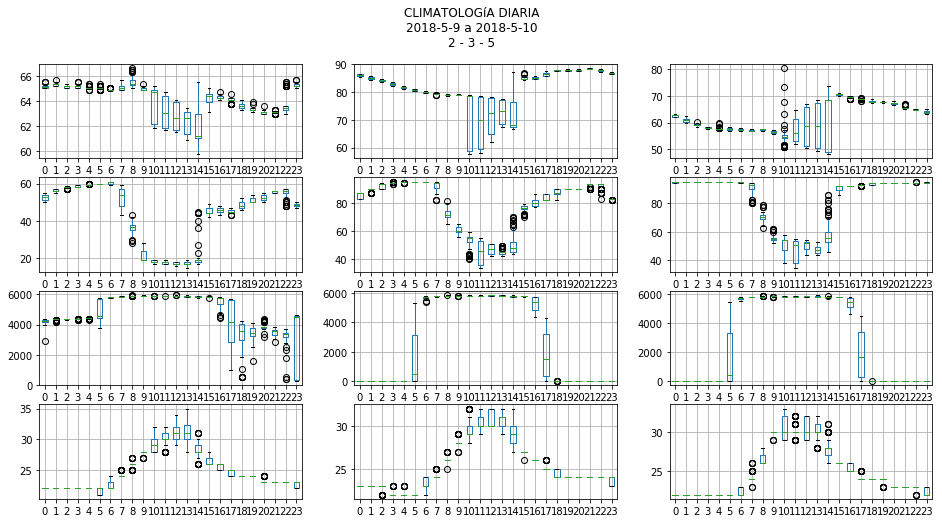

<Figure size 1152x576 with 0 Axes>

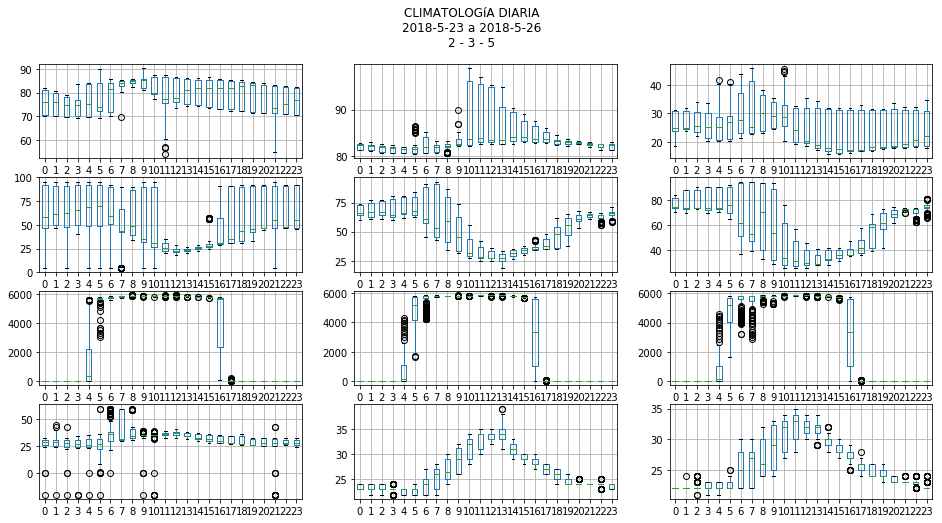

<Figure size 1152x576 with 0 Axes>

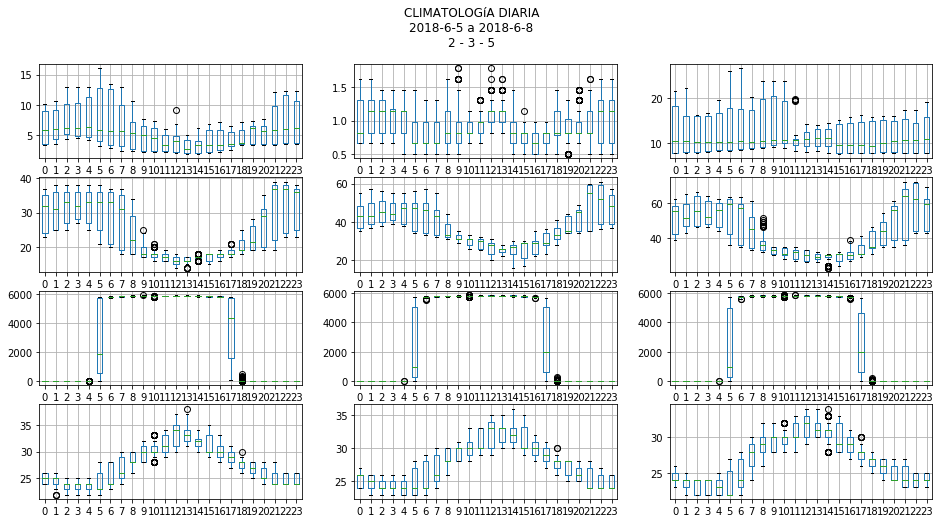

In [21]:
#                                                                            |
for t in periodo:
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 8]
    fig, axes = plt.subplots(nrows=4, ncols=3)
    x, y = 0, 0
    
    for pos,var in enumerate(periodo[1].columns):    
        
        c = max([periodo[t].loc[:,var][periodo[t].index.hour==h].count()\
                 for h in range(12)])

        temp = pd.DataFrame(index=range(c))
        inicio = str(periodo[t].index.year[0])+'-'+\
        str(periodo[t].index.month[0])+\
        '-'+str(periodo[t].index.day[0])
        fin = str(periodo[t].index.year[-1])+'-'+\
        str(periodo[t].index.month[-1])+'-'+\
        str(periodo[t].index.day[-1])
        x = int(pos/3)
        if y == 3:
            y = 0;

        for h in range(24):
            temp[h] = pd.Series(periodo[t].loc[:,var][periodo[t].index.\
                                                      hour==h].values)
        det = temp.describe()
        temp.boxplot(ax=axes[x,y])
        plt.suptitle('CLIMATOLOGíA DIARIA\n%s a %s\n2 - 3 - 5'%(inicio,fin))
        y+=1
display('Las gragicas corresponden a os tres periodos de tiempo/n \
además tiene las estrcuctura nodo/variable')

In [ ]:
periodo[2]['hora'] = periodo[2].index.hour

In [19]:
periodo[2].head()

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5,hora
2018-05-23 10:08:00,78.50,98.88,43.19,49.0,33.0,35.0,5829.0,5788.0,5782.0,35.0,30.0,30.0,10
2018-05-23 10:09:00,78.34,98.56,42.87,49.0,33.0,35.0,5829.0,5788.0,5777.0,35.0,30.0,30.0,10
2018-05-23 10:10:00,78.50,98.56,44.63,49.0,33.0,35.0,5829.0,5788.0,5788.0,35.0,30.0,30.0,10
2018-05-23 10:11:00,78.34,98.56,45.60,49.0,33.0,35.0,5829.0,5788.0,5788.0,35.0,30.0,30.0,10
2018-05-23 10:12:00,78.34,98.56,44.79,49.0,33.0,35.0,5829.0,5788.0,5794.0,35.0,30.0,30.0,10


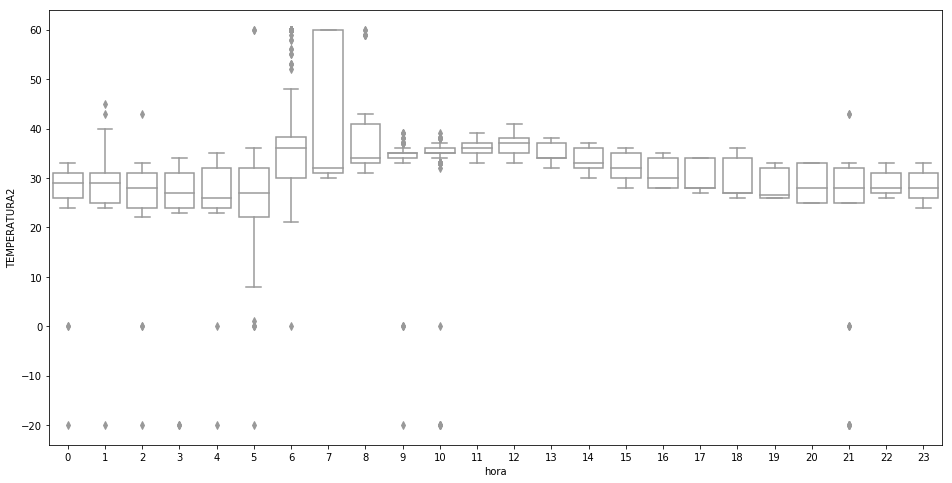

In [23]:
import seaborn as sns
sns.boxplot(x='hora',y='TEMPERATURA2',data=periodo[2],color='w')


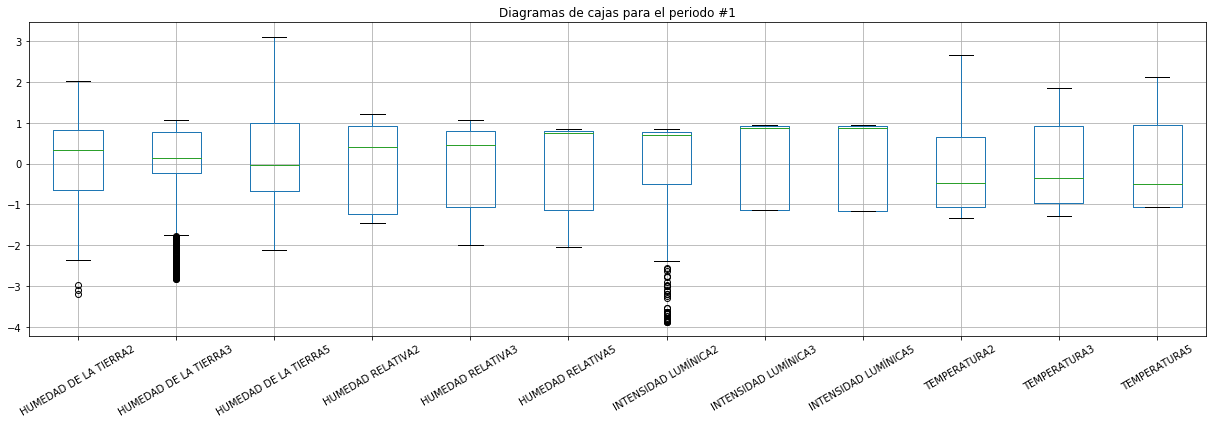

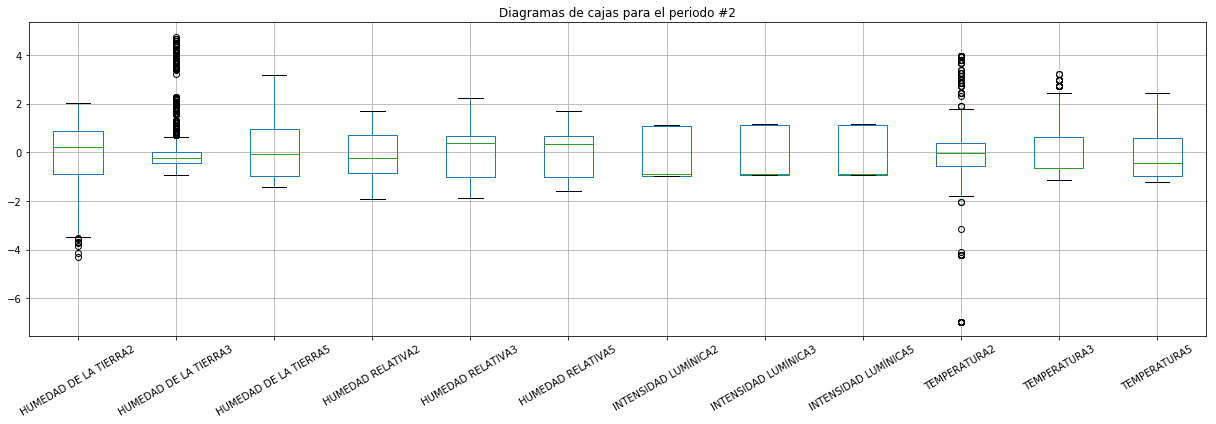

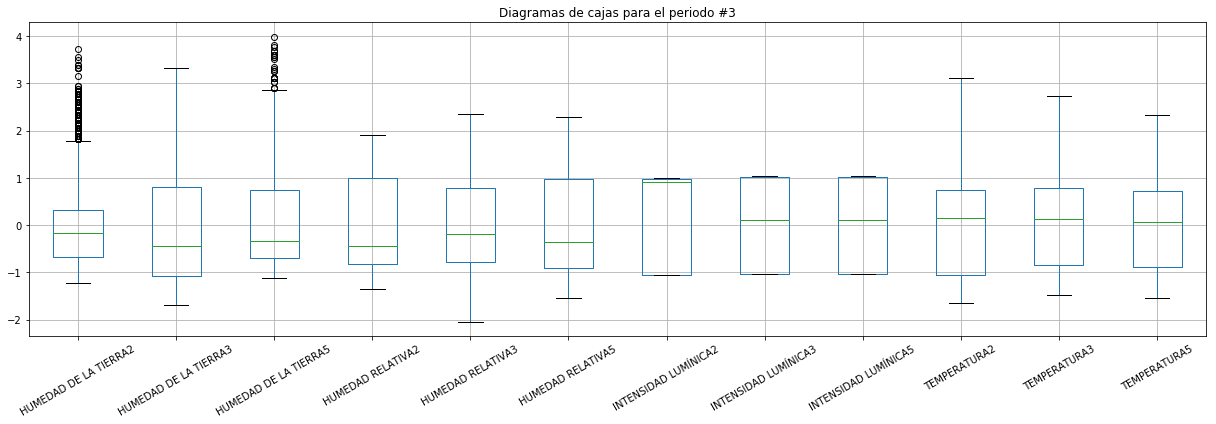

In [11]:
for t in periodo:
    plt.figure(figsize=[17,6])
    df[t].boxplot(rot=30)
    plt.title('Diagramas de cajas para el periodo #%d'%t)
    plt.tight_layout()